# Task 1

In task 1, we are going to use linear regression to predict the score of a student based on the number of hours of his/her study.

In [22]:
# Importing all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# As we want our plots to appear inside the notebook
%matplotlib inline 

# Model from Scikit-Learn that we are going to use
from sklearn.linear_model import LinearRegression

#To divide the data into train and test set
from sklearn.model_selection import train_test_split,cross_val_score
#For improvising our model 
from sklearn.model_selection import GridSearchCV
#To evaulate model
from sklearn.metrics import accuracy_score
from sklearn import metrics






# Understanding the data

In [23]:
dt = pd.read_csv("student_scores - student_scores.csv") #Getting the data to the notebook
dt.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
dt.count() #Making sure no null values

Hours     25
Scores    25
dtype: int64

In [26]:
dt.dtypes #Making sure all values are numerical

Hours     float64
Scores      int64
dtype: object

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

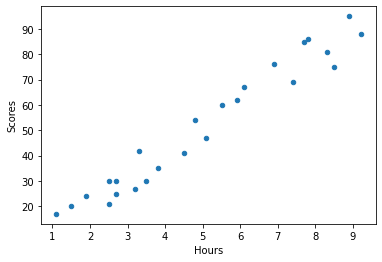

In [27]:
dt.plot( x = 'Hours', y = 'Scores', kind = 'scatter') #plotting the data

# Getting the data ready and fitting into the model

In [28]:
# Split into X/y
X = dt.drop("Scores",axis=1)
y = dt["Scores"]
# Split into training and test with a test size of 0.2
np.random.seed(2222)# To fix the training and test s
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)


In [29]:
# Build machine learning model and making the data fit in it

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Lets get to our objective

In [30]:
ypreds = model.predict(X_test)
ypreds

array([78.55611112, 46.71910029, 39.75475417, 34.78022123, 86.51536383])

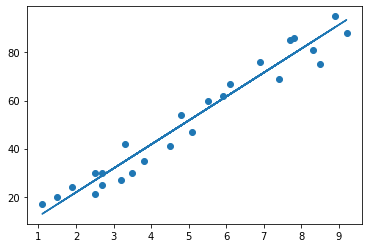

In [31]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [32]:
obj = model.predict([[9.25]])

In [33]:
obj

array([93.97716324])

So for studying 9.25 hours/day a student can score 93.997

# Lets evaluate our model

In [34]:
model.score(X_test,y_test)#evaluating model

0.8635283497169499

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypreds))

Mean Absolute Error: 7.13057718851455


In [42]:
cross_val_score(model, X, y, cv=5)#it shows the model's score with different sets of test and train data

array([0.78626426, 0.97891923, 0.93182467, 0.96604831, 0.9273292 ])

# Lets try to change the hyperameters of our model

In [37]:
model.get_params()#understanding parameters that our model has

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [38]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}#changing parameters

In [39]:
gs_model = GridSearchCV(model, parameters, cv=6)#making a new model with the change in parameters and fitting the data
gs_model.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [40]:
gs_model.score(X_test, y_test)#new model score

0.8572665514002789

In [41]:
ypred = gs_model.predict([[9.25]])#results showing with the new model
ypred

array([94.93844281])